<a href="https://colab.research.google.com/github/Gauravsaha-97/LinearRegression/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def generate_set(n = 1000):
  b = 1.0
  w = [1.0, -3.0]
  w = np.reshape(w,(2,1))
  x = np.random.randn(n,2)
  y = np.dot(x,w) + b + np.random.randn()
  y = np.reshape(y ,(n,1))
  return x, y

In [16]:
x,y = generate_set()
print(x.shape, y.shape)

(1000, 2) (1000, 1)


In [17]:
print(x[0],y[0])

[-1.09107932 -0.13893491] [0.40940174]


In [0]:
class Model:
  def __init__(self, num_features):
    self.num_features = num_features
    self.w = np.random.randn(num_features, 1)
    self.b = np.random.randn()
    

In [14]:
model_1 = Model(2)
print(model_1.w, model_1.b)

[[-0.27851678]
 [-2.01202206]] -0.08943733714859484


In [18]:
class Model(Model):
  def forward_pass(self,x):
    y_hat = self.b + np.dot(x, self.w)
    return y_hat
y_hat = Model(2).forward_pass(x)
print(y_hat.shape, y_hat[0])

(1000, 1) [-2.92542192]


In [0]:
class Model(Model):
  def generate_loss(self, y_hat, y_true):
    return np.sum(np.square(y_hat - y_true))/(2*y_hat.shape[0])

In [22]:
model = Model(2)
y_hat = model.forward_pass(x)
loss = model.generate_loss(y_hat, y)
print(loss)

7.300312014053439


In [0]:
class Model(Model):
  def backward_pass(self, y_true, y_hat, x):
    m = y_hat.shape[0]
    dB = 1/m * np.sum(y_hat - y_true)
    dW = 1/m * np.sum(np.dot(np.transpose(y_hat - y_true), x),axis = 0)
    return dB, dW


In [30]:
model = Model(2)
y_hat = model.forward_pass(x)
dB, dW = model.backward_pass(y, y_hat,x)
print(dB, dW)

-0.9340454709299258 [-2.87564909  1.83791173]


In [0]:
class Model(Model):
  def update_parameters(self, dB, dW, lr):
    self.b = self.b - dB
    self.w = self.w - np.reshape(dW, self.w.shape)*lr
    

In [0]:
class Model(Model):
  def train_model(self, x_train, y_train, lr, iterations):
    losses = []
    for i in range(0, iterations):
      y_hat = self.forward_pass(x_train)
      loss = self.generate_loss(y_hat, y_train)
      dB, dW = self.backward_pass(y_train, y_hat, x_train)
      self.update_parameters(dB, dW, lr)
      losses.append(loss)
      if i%int(iterations/10)==0:
        print('Iterations: {}, Loss: {:.3f}'.format(i, loss))
    return losses

In [36]:
model = Model(2)
x_train, y_train = generate_set()
loss = model.train_model(x_train, y_train, 3e-3, 1000)

Iterations: 0, Loss: 7.784
Iterations: 100, Loss: 2.731
Iterations: 200, Loss: 1.490
Iterations: 300, Loss: 0.814
Iterations: 400, Loss: 0.446
Iterations: 500, Loss: 0.245
Iterations: 600, Loss: 0.135
Iterations: 700, Loss: 0.074
Iterations: 800, Loss: 0.041
Iterations: 900, Loss: 0.023


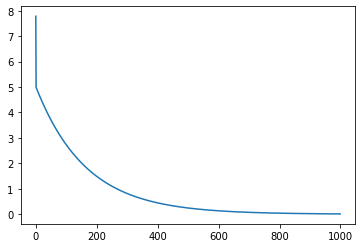

In [38]:
plt.plot(loss)

Text(0, 0.5, 'Ground Truth')

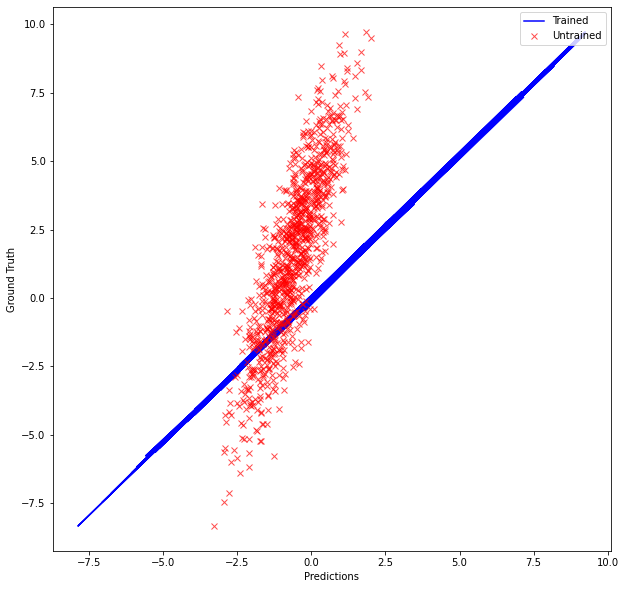

In [50]:
model_untrained = Model(2)
x_test, y_test = generate_set(1000)
preds_untrained = model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)
plt.figure(figsize = (10,10))
plt.plot(preds_trained, y_test,'b', label = 'Trained')
plt.plot(preds_untrained, y_test,'rx', label='Untrained', alpha = 0.7)
plt.legend(loc = 'upper right')
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')